In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import minmax_scale
from matplotlib.colors import rgb2hex
import mapclassify
import adjustText as aT
import matplotlib as mpl
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import plotly.figure_factory as ff
import plotly.express as px

# incorporamos geopandas! geografía + pandas :)
import geopandas as gpd
from sklearn.preprocessing import normalize

%matplotlib inline
sns.set(context='notebook', style='white', palette='plasma')
#https://plot.ly/python/v3/table/
#https://seaborn.pydata.org/tutorial/color_palettes.html
#http://colorbrewer2.org/#type=sequential&scheme=Greens&n=3
#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

In [27]:
numeroRegion=13
numeroDivisiones=4
fontSizeTitulo=40
fontSizeEnMapa=10
colorSchema='Wistia'
Zoom=3
schemev='natural_breaks'

In [28]:
dataProsupuestoMunicipal = pd.read_excel('data/datos_municipales_Disponibilidad_Presupuesto_PerCapita.xls')
#dataProsupuestoMunicipal.head()

In [29]:
dataPobreza = pd.read_excel('data/Indice_Pobreza_Porcentaje_Casem2018.xlsx')
#dataPobreza.head()

In [30]:
zonas_eod = gpd.read_file('data/Comunas', encoding="utf-8",converters={'cod_comuna':str})
zonas_eod.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."


In [31]:
zonas_eod = zonas_eod[zonas_eod.cod_comuna != 5104]
zonas_eod = zonas_eod[zonas_eod.cod_comuna != 5201] 

In [32]:
dataset = pd.merge(zonas_eod, dataPobreza, left_on='cod_comuna',right_on='CODIGO',how='inner') 
dataset = pd.merge(dataset, dataProsupuestoMunicipal, left_on='cod_comuna',right_on='CODIGO',how='inner') 
dataset.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO_x,MUNICIPIO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,MUNICIPIO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731....",6204,MARCHIHUE,12.52,6204,MARCHIHUE,409.77
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596....",6102,CODEGUA,14.15,6102,CODEGUA,220.92
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621....",6103,COINCO,15.59,6103,COINCO,309.21
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266....",6104,COLTAUCO,14.81,6104,COLTAUCO,193.27
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644....",9121,CHOLCHOL,42.85,9121,CHOLCHOL,293.23


In [33]:
codigoRegion=13
datasetRegion=dataset[dataset['codregion']==numeroRegion]
#########
#datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'CALERA DE TANGO']
#datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'COLINA'] 
#datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'LAMPA']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'PIRQUE'] 
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'CURACAVÍ'] 
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'MARÍA PINTO'] 
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'EL MONTE']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'TALAGANTE']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'ISLA DE MAIPO']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'PAINE']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'TILTIL']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'BUIN']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'SAN JOSÉ DE MAIPO']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'MELIPILLA']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'SAN PEDRO']
datasetRegion = datasetRegion[datasetRegion.MUNICIPIO_x != 'ALHUÉ']
###########

datasetRegion=datasetRegion.reset_index()
datasetRegion['Indice'] = datasetRegion.index
#datasetRegion.head()

In [34]:
datasetRegion["center"] = datasetRegion["geometry"].centroid
datasetRegion_points = datasetRegion.copy()
datasetRegion_points.set_geometry("center", inplace = True)

In [35]:
datasetRegion.describe()

,index,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,CODIGO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018,Indice
count,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.0,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,132.641026,776.384615,36977.124416,10.589744,7.0,13167.820513,13.0,1.441608e+08,44560.435019,13167.820513,7.044359,13167.820513,289.940769,19.000000
std,49.757563,2872.995050,36655.028415,2.035448,0.0,127.208050,0.0,3.232383e+08,43922.543865,127.208050,3.805830,127.208050,219.955306,11.401754
min,26.000000,288.000000,10795.433316,8.000000,7.0,13101.000000,13.0,9.056280e+06,12827.159439,13101.000000,0.030000,13101.000000,123.130000,0.000000
25%,108.500000,308.500000,13994.375779,9.000000,7.0,13110.500000,13.0,1.595480e+07,17545.506898,13110.500000,4.190000,13110.500000,165.035000,9.500000
50%,136.000000,318.000000,23724.899355,10.000000,7.0,13120.000000,13.0,3.337678e+07,28343.661508,13120.000000,7.220000,13120.000000,226.470000,19.000000
75%,164.500000,327.500000,46906.835635,12.500000,7.0,13129.500000,13.0,1.040717e+08,56445.848084,13129.500000,9.655000,13129.500000,295.260000,28.500000
max,227.000000,18258.000000,172581.447530,14.000000,7.0,13605.000000,13.0,1.469677e+09,206660.187466,13605.000000,14.540000,13605.000000,1008.340000,38.000000


In [36]:
datasetRegion.head()

,index,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,...,Provincia,geometry,CODIGO_x,MUNICIPIO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,MUNICIPIO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018,Indice,center
0,26,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,...,Santiago,"POLYGON ((-7861762.687 -3958307.095, -7861708....",13129,SAN JOAQUÍN,6.60,13129,SAN JOAQUÍN,327.85,0,POINT (-7862318.491 -3961339.726)
1,36,331,13311.641304,13,7,13130,13,1.389538e+07,15988.816037,Región Metropolitana de Santiago,...,Santiago,"POLYGON ((-7863229.775 -3964360.652, -7863319....",13130,SAN MIGUEL,3.46,13130,SAN MIGUEL,220.04,1,POINT (-7864897.514 -3961740.664)
2,47,332,11733.486710,13,7,13131,13,9.056280e+06,14061.528858,Región Metropolitana de Santiago,...,Santiago,"POLYGON ((-7863398.118 -3964354.273, -7863319....",13131,SAN RAMÓN,9.41,13131,SAN RAMÓN,134.23,2,POINT (-7863858.574 -3967266.153)
3,56,309,11488.695747,9,7,13108,13,1.068637e+07,14088.417488,Región Metropolitana de Santiago,...,Santiago,"POLYGON ((-7865631.125 -3948404.075, -7865643....",13108,INDEPENDENCIA,9.85,13108,INDEPENDENCIA,190.60,3,POINT (-7866395.036 -3950456.597)
4,60,310,12797.595762,13,7,13109,13,1.454185e+07,15442.412755,Región Metropolitana de Santiago,...,Santiago,"POLYGON ((-7865040.615 -3968217.521, -7865077....",13109,LA CISTERNA,3.63,13109,LA CISTERNA,166.32,4,POINT (-7866268.102 -3965876.715)


# Pobreza

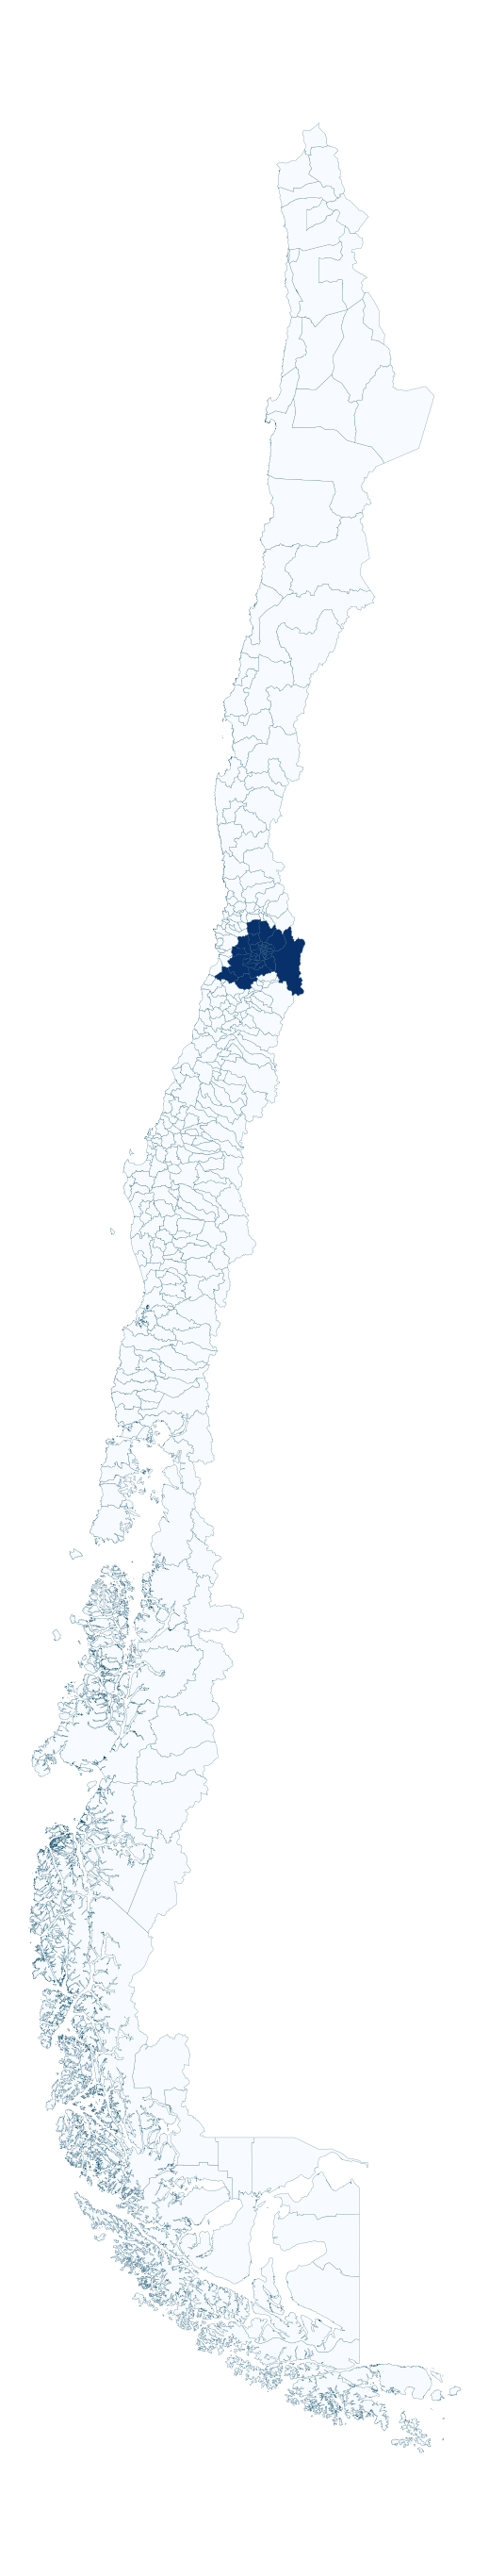

In [37]:
dataset['Seleccion']=0
dataset.loc[dataset['codregion'] == numeroRegion,'Seleccion'] = 1

ax = dataset.plot(figsize=(20, 50), column='Seleccion', cmap='Blues', 
                         legend=False, linewidth=0.2, edgecolor='#125069', scheme=schemev, 
                         k=2)
##########################################
#plt.title('Chile', fontsize=fontSizeTitulo)
ax.set_axis_off()

In [38]:
len(datasetRegion)

39

In [39]:
datasetRegion['IndiceNombre']=datasetRegion['Indice'].map(str) +':'+ datasetRegion['Comuna']
datasetRegion['NombreIndice']=datasetRegion['Comuna']+':'+ datasetRegion['Indice'].map(str)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(datasetRegion[['Comuna']].columns),
                fill_color='lightskyblue',
                line_color='#87CEEB',
                align='left'),
    cells=dict(values=[datasetRegion.IndiceNombre],
               fill_color='white',
                line_color='#87CEEB',
               align='left'))
])

fig.update_layout(width=320, height= (26 * len(datasetRegion) ), font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )     )
fig.show()

1

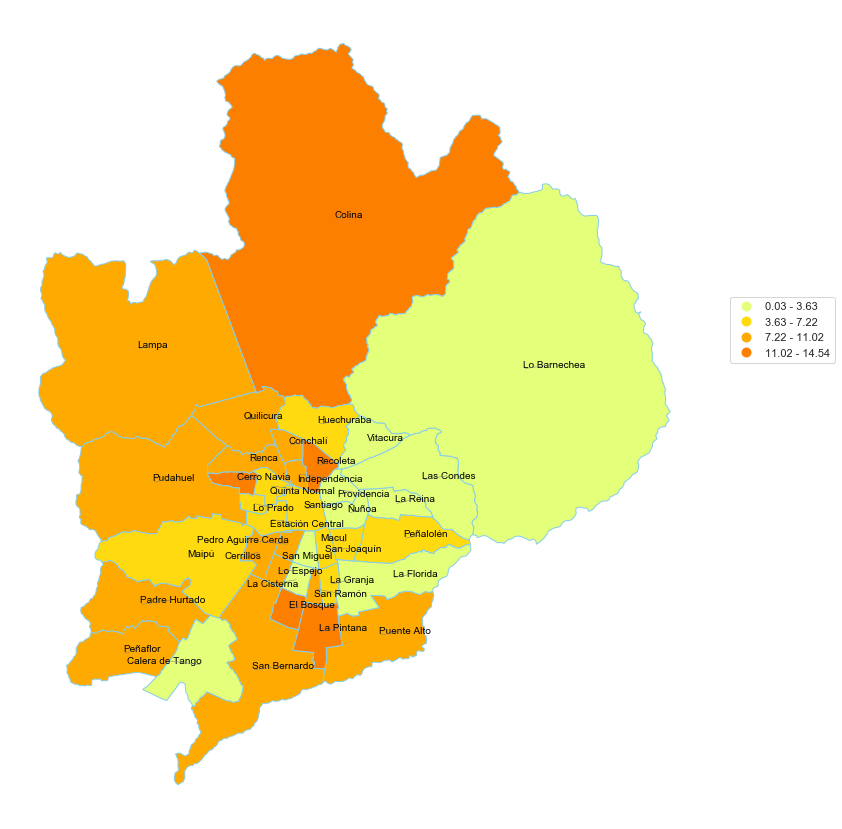

In [40]:
ax = datasetRegion.plot(figsize=(15, 15), column='Indice_Pobreza_Porcentaje_Casem2018', cmap=colorSchema, 
                         legend=True, linewidth=1, edgecolor='#87CEEB', scheme=schemev, 
                         k=numeroDivisiones)
##########################################
#plt.title('Porcentaje de Pobreza', fontsize=fontSizeTitulo)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))

#'box_plot', 'equal_interval', 'fisher_jenks', 'fisher_jenks_sampled', 'headtail_breaks', 
# 'jenks_caspall', 'jenks_caspall_forced', 'jenks_caspall_sampled', 'max_p_classifier', 
# 'maximum_breaks', 'natural_breaks', 'quantiles', 'percentiles', 'std_mean', 'user_defined'


#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
#CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, 
#Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
#PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r,
#RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1,
#Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
#YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, 
#brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix,
#cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, 
#gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, 
#gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r,
#magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, 
#prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r,
#tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight,
#twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


##########################################
#ylim = (-3970000,-3920000) # latitude 
#xlim = (-7880000,-7830000) # longitude

#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, 
                       datasetRegion_points["Comuna"]):texts.append(plt.text(x, y, label, fontsize = fontSizeEnMapa,
                                                                             color='black'))
##########################################
aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))



1

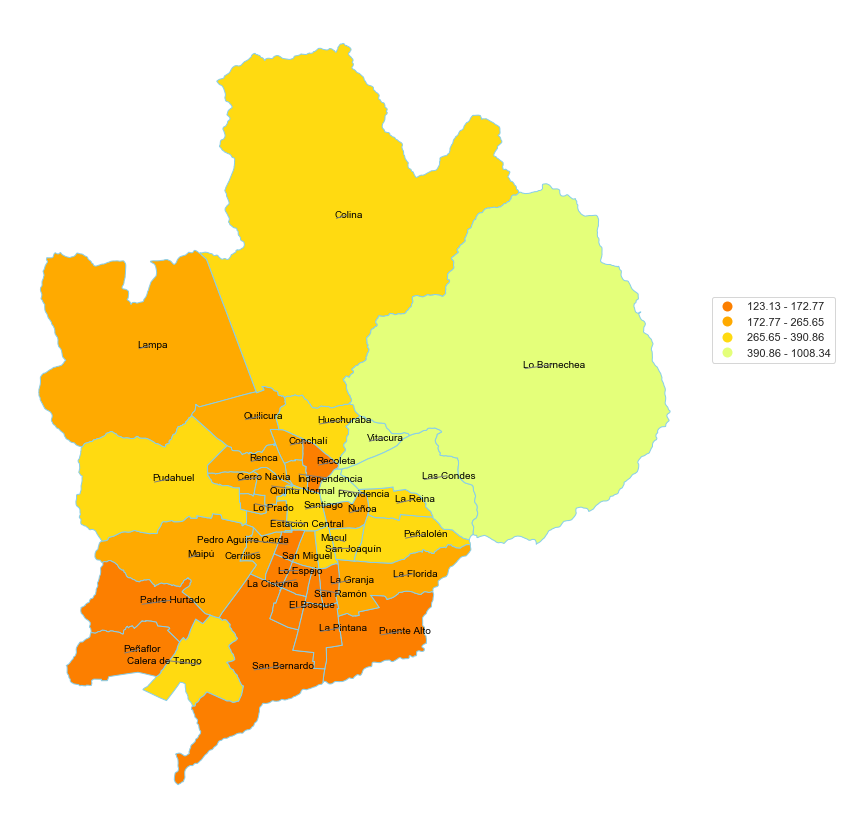

In [41]:
ax = datasetRegion.plot(figsize=(15, 15), column='IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018', 
                        cmap=(colorSchema+'_r'), 
                         legend=True, linewidth=1, edgecolor='#87CEEB', scheme=schemev, 
                         k=numeroDivisiones)
##########################################
#plt.title('Presupuesto por Habitante', fontsize=fontSizeTitulo)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
##########################################
#ylim = (-3970000,-3920000) # latitude 
#xlim = (-7880000,-7830000) # longitude

#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, 
                       datasetRegion_points["Comuna"]):texts.append(plt.text(x, y, label, fontsize = fontSizeEnMapa,
                                                                             color='black'))
##########################################
aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='grey', lw=1))
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))



In [46]:
chartdf = datasetRegion[['Comuna','Indice_Pobreza_Porcentaje_Casem2018']]

chartdf=chartdf.sort_values(by='Indice_Pobreza_Porcentaje_Casem2018', ascending=False)

fig = px.bar(chartdf, y='Comuna', x='Indice_Pobreza_Porcentaje_Casem2018',orientation='h',
             hover_data=['Indice_Pobreza_Porcentaje_Casem2018','Comuna'],
             labels={'Indice_Pobreza_Porcentaje_Casem2018':'','Comuna':''}, 
             height=1000,width=500)
fig.update_layout( xaxis_tickangle=-90)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=0.5, opacity=0.8)
fig.show()

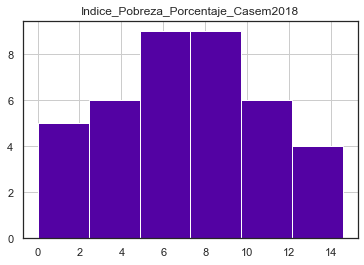

In [47]:
hist = chartdf.hist(bins=6)

In [48]:
chartdf = datasetRegion[['Comuna','IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018']]

chartdf=chartdf.sort_values(by='IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018', ascending=True)

fig = px.bar(chartdf, y='Comuna', x='IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018',orientation='h',
             hover_data=['IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018','Comuna'],
             labels={'IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018':'','Comuna':''}, 
             height=1000,width=500)
fig.update_layout( xaxis_tickangle=-90)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=0.5, opacity=0.8)
fig.show()


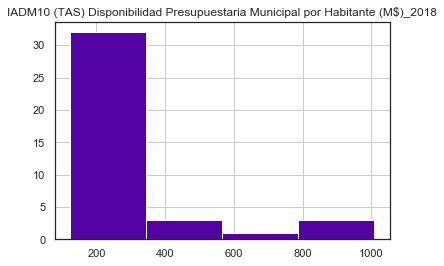

In [49]:
hist = chartdf.hist(bins=4)